In [4]:
import os
import glob
import pandas as pd

# Change directory to the environment directory
os.chdir("/om2/user/sahil003/myenv")
print(os.getcwd())

# Define file patterns for CSV files in various subdirectories
csv_files_cutout = glob.glob("final_selective_analysis_output_avgpool/cutout_color_final_v*/fractions_summary.csv")
csv_files_mixed = glob.glob("final_selective_analysis_output_avgpool/mixed_final_v*/fractions_summary.csv")
csv_files_noncutout = glob.glob("final_selective_analysis_output_avgpool/noncutout_greyscale_v*/fractions_summary.csv")
csv_files_varying_face_0 = glob.glob("final_selective_analysis_output_avgpool/varying_face_0%_v*/fractions_summary.csv")
csv_files_varying_face_33 = glob.glob("final_selective_analysis_output_avgpool/varying_face_33%_v*/fractions_summary.csv")
csv_files_varying_face_100 = glob.glob("final_selective_analysis_output_avgpool/varying_face_100%_v*/fractions_summary.csv")
csv_files_varying_food_0 = glob.glob("final_selective_analysis_output_avgpool/varying_food_0%_v*/fractions_summary.csv")
csv_files_varying_food_33 = glob.glob("final_selective_analysis_output_avgpool/varying_food_33%_v*/fractions_summary.csv")
csv_files_varying_food_100 = glob.glob("final_selective_analysis_output_avgpool/varying_food_100%_v*/fractions_summary.csv")

# Read each CSV file into a list of DataFrames
dfs_cutout = [pd.read_csv(file) for file in csv_files_cutout]
dfs_mixed = [pd.read_csv(file) for file in csv_files_mixed]
dfs_noncutout = [pd.read_csv(file) for file in csv_files_noncutout]
dfs_varying_face_0 = [pd.read_csv(file) for file in csv_files_varying_face_0]
dfs_varying_face_33 = [pd.read_csv(file) for file in csv_files_varying_face_33]
dfs_varying_face_100 = [pd.read_csv(file) for file in csv_files_varying_face_100]
dfs_varying_food_0 = [pd.read_csv(file) for file in csv_files_varying_food_0]
dfs_varying_food_33 = [pd.read_csv(file) for file in csv_files_varying_food_33]
dfs_varying_food_100 = [pd.read_csv(file) for file in csv_files_varying_food_100]

# Add a 'model' column to each DataFrame based on the file type and index
for i, df in enumerate(dfs_cutout):
    df['model'] = f"cutout_color_final_v{i+1}"
for i, df in enumerate(dfs_mixed):
    df['model'] = f"mixed_final_v{i+1}"
for i, df in enumerate(dfs_noncutout):
    df['model'] = f"noncutout_greyscale_final_v{i+1}"
for i, df in enumerate(dfs_varying_face_0):
    df['model'] = f"varying_face_0%_v{i+1}"
for i, df in enumerate(dfs_varying_face_33):
    df['model'] = f"varying_face_33%_v{i+1}"
for i, df in enumerate(dfs_varying_face_100):
    df['model'] = f"varying_face_100%_v{i+1}"
for i, df in enumerate(dfs_varying_food_0):
    df['model'] = f"varying_food_0%_v{i+1}"
for i, df in enumerate(dfs_varying_food_33):
    df['model'] = f"varying_food_33%_v{i+1}"
for i, df in enumerate(dfs_varying_food_100):
    df['model'] = f"varying_food_100%_v{i+1}"

# Combine all DataFrames into a single DataFrame for each file type
full_df_cutout = pd.concat(dfs_cutout, ignore_index=True)
full_df_mixed = pd.concat(dfs_mixed, ignore_index=True)
full_df_noncutout = pd.concat(dfs_noncutout, ignore_index=True)
full_df_varying_face_0 = pd.concat(dfs_varying_face_0, ignore_index=True)
full_df_varying_face_33 = pd.concat(dfs_varying_face_33, ignore_index=True)
full_df_varying_face_100 = pd.concat(dfs_varying_face_100, ignore_index=True)
full_df_varying_food_0 = pd.concat(dfs_varying_food_0, ignore_index=True)
full_df_varying_food_33 = pd.concat(dfs_varying_food_33, ignore_index=True)
full_df_varying_food_100 = pd.concat(dfs_varying_food_100, ignore_index=True)

from IPython.core.display import display_html

def display_side_by_side(*dfs):
    html_str = ''
    for df in dfs:
        html_str += df.to_html().replace('border="1"', 
                                         'style="display:inline-block; margin-right:20px;"')
    display_html(html_str, raw=True)

/net/vast-storage/scratch/vast/nklab/sahil003/myenv


In [5]:
## There seems to be an issue: some fraction summaries dont have word in it. I will fix this later but results for word may be bad, rest are okay.

In [6]:
display_side_by_side(full_df_varying_face_0[full_df_varying_face_0["Layer"] == 'avgpool'])

,Layer,Class,Fraction,model


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.transforms as mtransforms

# Define unique models and layers
models = full_df['model'].unique()
layers = ["conv1", "conv2", "conv3", "conv4", "conv5", "avgpool"]

# Define colors for classes + unselective units
class_colors = {
    "face": "#ff9999",  # Light Red
    "scene": "#66b3ff", # Light Blue
    "body": "#99ff99",  # Light Green
    "word": "#ffcc99"   # Light Orange
}
unselective_color = "#d9d9d9"  # Light Gray for unselective units

# Set up the figure and axis grid
fig, axes = plt.subplots(len(models), len(layers), figsize=(len(layers) * 3.5, len(models) * 3.5))

# Ensure white background
plt.style.use("default")  
fig.patch.set_facecolor("white")  

for i, model in enumerate(models):
    for j, layer in enumerate(layers):
        # Extract relevant data
        df_layer = full_df[(full_df['model'] == model) & (full_df['Layer'] == layer)]
        
        # Get class fractions in the correct order
        selective_fractions = [df_layer[df_layer['Class'] == cls]['Fraction'].sum() for cls in class_colors.keys()]
        
        # Compute unselective fraction
        unselective_fraction = max(0, 1 - sum(selective_fractions))  # Avoid negative values due to rounding
        fractions = selective_fractions + [unselective_fraction]
        
        # Corresponding colors
        colors = list(class_colors.values()) + [unselective_color]
        
        # Skip empty cases
        if sum(selective_fractions) == 0:
            axes[i, j].axis('off')
            continue
        
        # Create pie chart
        wedges, texts, autotexts = axes[i, j].pie(
            fractions, labels=None, autopct='%1.3f%%',
            colors=colors, startangle=140, pctdistance=1.8, textprops={'fontsize': 9}
        )

        # Improve label placement
        for autotext, wedge in zip(autotexts, wedges):
            angle = (wedge.theta2 + wedge.theta1) / 2
            x, y = autotext.get_position()
            if angle > 180:  # Push labels outward for clarity
                autotext.set_x(x * 1.1)
                autotext.set_y(y * 1.1)
            autotext.set_bbox(dict(facecolor="white", edgecolor="none", pad=0.3))  # Background for clarity
            autotext.set_fontsize(9)
            autotext.set_color("black")

        # Set title for each pie chart
        axes[i, j].set_title(f"{model}\n{layer}", fontsize=10)

# Create a legend outside the plot (global legend for all subplots)
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in list(class_colors.values()) + [unselective_color]]
legend_names = list(class_colors.keys()) + ["Unselective"]
fig.legend(legend_labels, legend_names, loc="lower center", ncol=5, fontsize=10, frameon=False)

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Make space for the legend
plt.show()


NameError: name 'full_df' is not defined

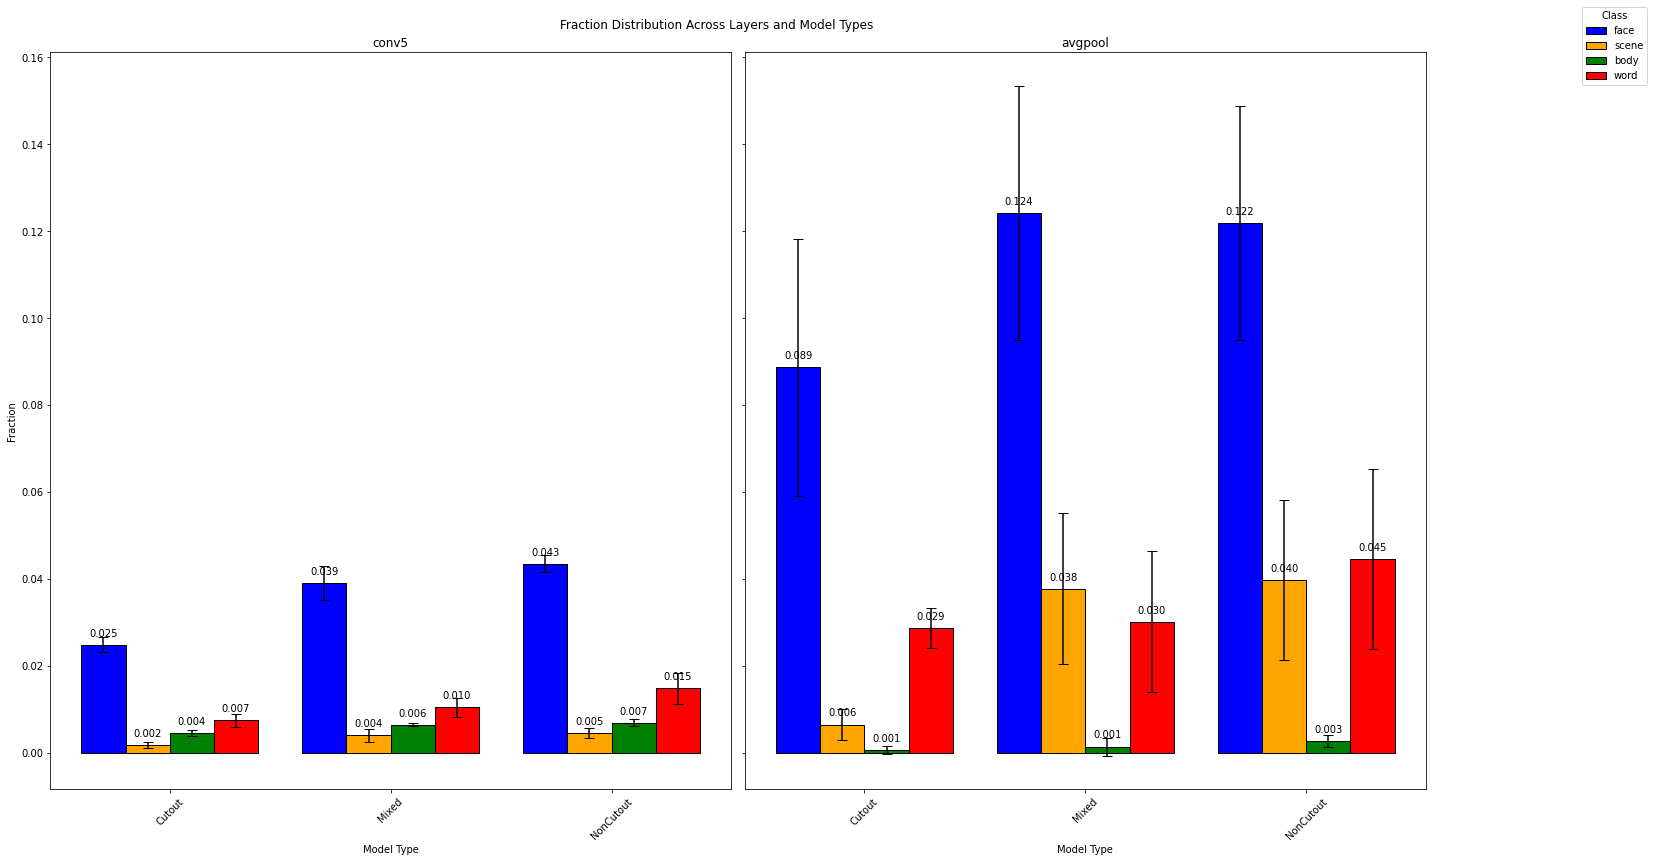

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the dataframes and add a model type column
full_df_cutout["ModelType"] = "Cutout"
full_df_mixed["ModelType"] = "Mixed"
full_df_noncutout["ModelType"] = "NonCutout"

df = pd.concat([full_df_cutout, full_df_mixed, full_df_noncutout])

# Compute unselective fraction for each (Layer, ModelType)
def compute_unselective(df):
    unselective = df.groupby(["Layer", "ModelType", "model"])['Fraction'].sum().reset_index()
    unselective['Class'] = 'unselective'
    unselective['Fraction'] = 1 - unselective['Fraction']
    return unselective

unselective_df = compute_unselective(df)
df = pd.concat([df, unselective_df])

# Define layer order and class colors
layers = ["conv1", "conv2", "conv3", "conv4", "conv5", "avgpool"]
classes = ["face", "scene", "body", "word"]
colors = {"face": "blue", "scene": "orange", "body": "green", "word": "red", "unselective": "grey"}

# Compute mean and standard deviation for error bars
grouped = df.groupby(["Layer", "ModelType", "Class"])['Fraction']
means = grouped.mean().unstack()
stds = grouped.std().unstack()


layers = layers[-2:]
# Plot setup
fig, axes = plt.subplots(1, len(layers), figsize=(20, 12), sharey=True)

for i, layer in enumerate(layers):
    ax = axes[i]
    
    # Extract data for the current layer
    layer_means = means.loc[layer]
    layer_stds = stds.loc[layer]
    
    # Bar width and positions
    bar_width = 0.2
    x = np.arange(len(layer_means))  # Positions for model types
    
    for j, cls in enumerate(classes):
        if cls in layer_means.columns:
            ax.bar(x + j * bar_width, layer_means[cls], yerr=layer_stds[cls], 
                   width=bar_width, color=colors[cls], label=cls if i == 0 else "", capsize=5, edgecolor='black')
            
            # Add text labels
            for k, v in enumerate(layer_means[cls]):
                ax.text(x[k] + j * bar_width, v + 0.002, f'{v:.3f}', ha='center', fontsize=10)
    
    ax.set_xticks(x + (bar_width * (len(classes) - 1)) / 2)
    ax.set_xticklabels(layer_means.index, rotation=45)
    ax.set_title(layer)
    ax.set_xlabel("Model Type")
    
axes[0].set_ylabel("Fraction")
fig.suptitle("Fraction Distribution Across Layers and Model Types")
fig.legend(title="Class", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


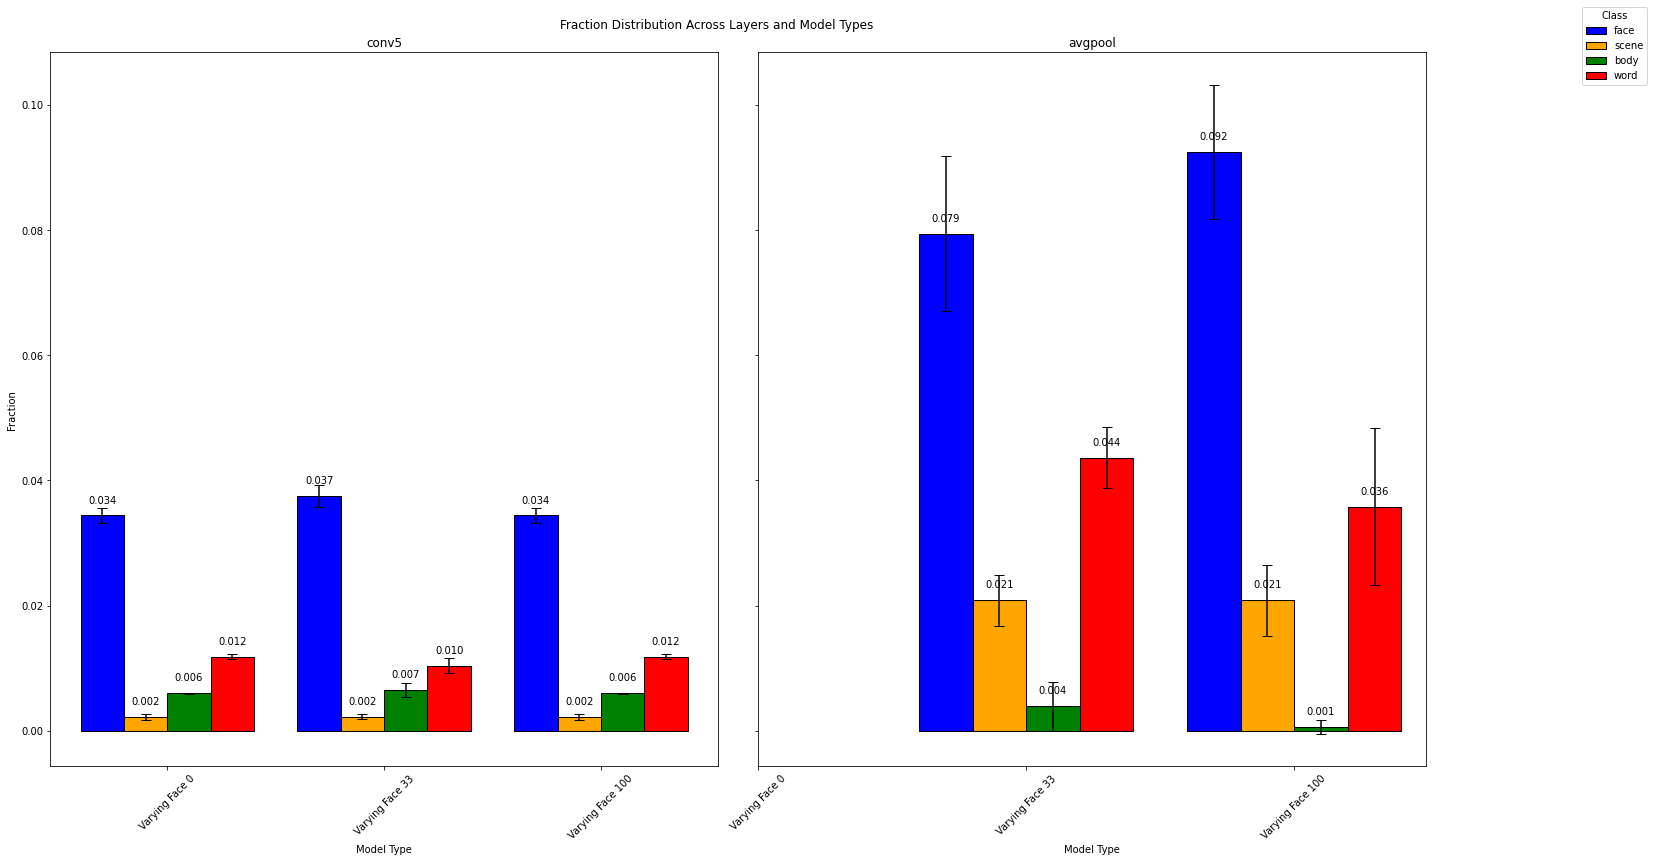

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the dataframes and add a model type column
full_df_varying_face_0["ModelType"] = "Varying Face 0"
full_df_varying_face_33["ModelType"] = "Varying Face 33"
full_df_varying_face_100["ModelType"] = "Varying Face 100"

df = pd.concat([full_df_varying_face_0, full_df_varying_face_33, full_df_varying_face_100])

# Compute unselective fraction for each (Layer, ModelType)
def compute_unselective(df):
    unselective = df.groupby(["Layer", "ModelType", "model"])['Fraction'].sum().reset_index()
    unselective['Class'] = 'unselective'
    unselective['Fraction'] = 1 - unselective['Fraction']
    return unselective

unselective_df = compute_unselective(df)
df = pd.concat([df, unselective_df])

# Define layer order and class colors
layers = ["conv1", "conv2", "conv3", "conv4", "conv5", "avgpool"]
classes = ["face", "scene", "body", "word"]
colors = {"face": "blue", "scene": "orange", "body": "green", "word": "red", "unselective": "grey"}

# Compute mean and standard deviation for error bars
grouped = df.groupby(["Layer", "ModelType", "Class"])['Fraction']
means = grouped.mean().unstack()
stds = grouped.std().unstack()

# Here we define the desired ordering for ModelType.
desired_order = ["Varying Face 0", "Varying Face 33", "Varying Face 100"]

# For the purpose of this plot, we'll use the last two layers from the original layers list
layers = layers[-2:]

# Plot setup
fig, axes = plt.subplots(1, len(layers), figsize=(20, 12), sharey=True)

for i, layer in enumerate(layers):
    ax = axes[i]
    
    # Extract data for the current layer
    # After selecting a layer, reindex to ensure the order of ModelType is as desired
    layer_means = means.loc[layer].reindex(desired_order)
    layer_stds = stds.loc[layer].reindex(desired_order)
    
    # Bar width and positions
    bar_width = 0.2
    x = np.arange(len(layer_means))  # Positions for model types
    
    for j, cls in enumerate(classes):
        if cls in layer_means.columns:
            ax.bar(x + j * bar_width, layer_means[cls], yerr=layer_stds[cls], 
                   width=bar_width, color=colors[cls], label=cls if i == 0 else "", capsize=5, edgecolor='black')
            
            # Add text labels
            for k, v in enumerate(layer_means[cls]):
                ax.text(x[k] + j * bar_width, v + 0.002, f'{v:.3f}', ha='center', fontsize=10)
    
    ax.set_xticks(x + (bar_width * (len(classes) - 1)) / 2)
    ax.set_xticklabels(layer_means.index, rotation=45)
    ax.set_title(layer)
    ax.set_xlabel("Model Type")
    
axes[0].set_ylabel("Fraction")
fig.suptitle("Fraction Distribution Across Layers and Model Types")
fig.legend(title="Class", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


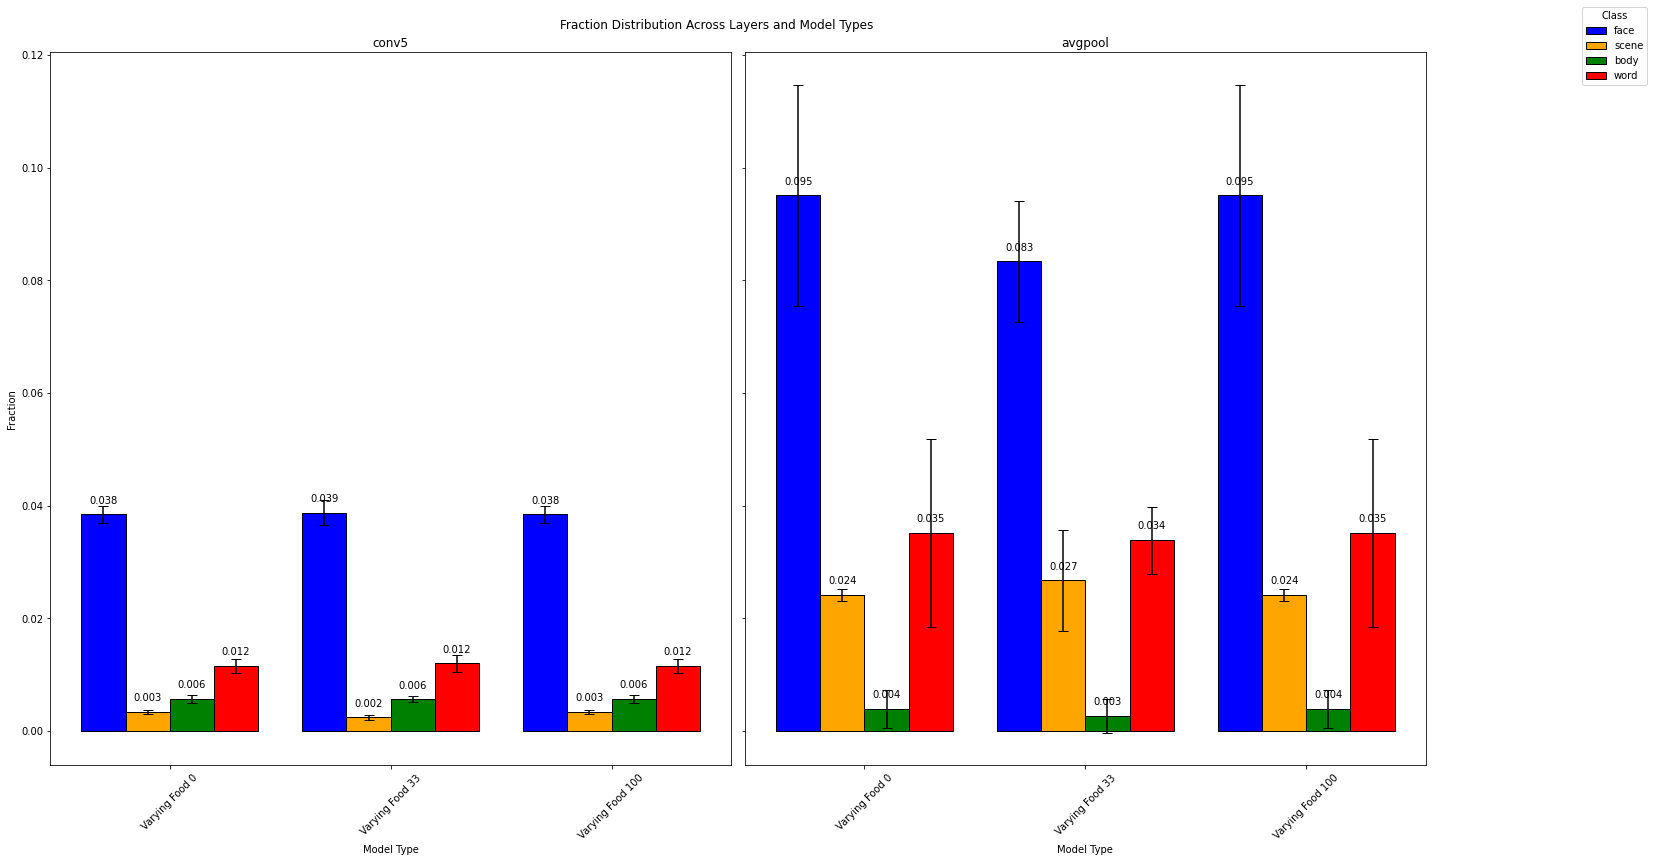

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the dataframes and add a model type column
full_df_varying_food_0["ModelType"] = "Varying Food 0"
full_df_varying_food_33["ModelType"] = "Varying Food 33"
full_df_varying_food_100["ModelType"] = "Varying Food 100"

df = pd.concat([full_df_varying_food_0, full_df_varying_food_33, full_df_varying_food_100])

# Compute unselective fraction for each (Layer, ModelType)
def compute_unselective(df):
    unselective = df.groupby(["Layer", "ModelType", "model"])['Fraction'].sum().reset_index()
    unselective['Class'] = 'unselective'
    unselective['Fraction'] = 1 - unselective['Fraction']
    return unselective

unselective_df = compute_unselective(df)
df = pd.concat([df, unselective_df])

# Define layer order and class colors
layers = ["conv1", "conv2", "conv3", "conv4", "conv5", "avgpool"]
classes = ["face", "scene", "body", "word"]
colors = {"face": "blue", "scene": "orange", "body": "green", "word": "red", "unselective": "grey"}

# Compute mean and standard deviation for error bars
grouped = df.groupby(["Layer", "ModelType", "Class"])['Fraction']
means = grouped.mean().unstack()
stds = grouped.std().unstack()

# Here we define the desired ordering for ModelType.
desired_order = ["Varying Food 0", "Varying Food 33", "Varying Food 100"]

# For the purpose of this plot, we'll use the last two layers from the original layers list
layers = layers[-2:]

# Plot setup
fig, axes = plt.subplots(1, len(layers), figsize=(20, 12), sharey=True)

for i, layer in enumerate(layers):
    ax = axes[i]
    
    # Extract data for the current layer
    # After selecting a layer, reindex to ensure the order of ModelType is as desired
    layer_means = means.loc[layer].reindex(desired_order)
    layer_stds = stds.loc[layer].reindex(desired_order)
    
    # Bar width and positions
    bar_width = 0.2
    x = np.arange(len(layer_means))  # Positions for model types
    
    for j, cls in enumerate(classes):
        if cls in layer_means.columns:
            ax.bar(x + j * bar_width, layer_means[cls], yerr=layer_stds[cls], 
                   width=bar_width, color=colors[cls], label=cls if i == 0 else "", capsize=5, edgecolor='black')
            
            # Add text labels
            for k, v in enumerate(layer_means[cls]):
                ax.text(x[k] + j * bar_width, v + 0.002, f'{v:.3f}', ha='center', fontsize=10)
    
    ax.set_xticks(x + (bar_width * (len(classes) - 1)) / 2)
    ax.set_xticklabels(layer_means.index, rotation=45)
    ax.set_title(layer)
    ax.set_xlabel("Model Type")
    
axes[0].set_ylabel("Fraction")
fig.suptitle("Fraction Distribution Across Layers and Model Types")
fig.legend(title="Class", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [10]:
import torch
import torchvision.models as models

# Set your checkpoint file path
MODEL_PATH = "/mindhive/nklab3/users/bowen/ecoset_models/"
checkpoint_path = "cutout_color_final_v1/checkpoint_cutout_color_0099.pth.tar"

# Load the checkpoint
checkpoint = torch.load(MODEL_PATH + checkpoint_path, map_location="cpu")

# Print the available keys
print("Checkpoint Keys:", checkpoint.keys())

# Print state dict keys and tensor shapes if available
if 'state_dict' in checkpoint:
    print("\nState Dict Keys and Shapes:")
    for key, tensor in checkpoint['state_dict'].items():
        print(f"{key}: {tensor.shape}")

Checkpoint Keys: dict_keys(['epoch', 'arch', 'state_dict', 'optimizer'])

State Dict Keys and Shapes:
module.queue: torch.Size([128, 65536])
module.queue_ptr: torch.Size([1])
module.encoder_q.conv1.weight: torch.Size([64, 3, 7, 7])
module.encoder_q.bn1.weight: torch.Size([64])
module.encoder_q.bn1.bias: torch.Size([64])
module.encoder_q.bn1.running_mean: torch.Size([64])
module.encoder_q.bn1.running_var: torch.Size([64])
module.encoder_q.bn1.num_batches_tracked: torch.Size([])
module.encoder_q.layer1.0.conv1.weight: torch.Size([64, 64, 3, 3])
module.encoder_q.layer1.0.bn1.weight: torch.Size([64])
module.encoder_q.layer1.0.bn1.bias: torch.Size([64])
module.encoder_q.layer1.0.bn1.running_mean: torch.Size([64])
module.encoder_q.layer1.0.bn1.running_var: torch.Size([64])
module.encoder_q.layer1.0.bn1.num_batches_tracked: torch.Size([])
module.encoder_q.layer1.0.conv2.weight: torch.Size([64, 64, 3, 3])
module.encoder_q.layer1.0.bn2.weight: torch.Size([64])
module.encoder_q.layer1.0.bn2.bias